# Cinco formas diferentes de calcular ACF
* Usando el metodo del comienzo del semestre con la funcion "shift"
* Usando la formula de recursion
* Usando la solucion analitica
En la clase anterior vimos que:
 We found the solution in Equation~\ref{ACFAR2} . That is,
    \begin{eqnarray*}
      \rho_0 &=& 1  \nonumber \\
      \rho_1 &=& \frac{\phi_1}{1 - \phi_2}  \nonumber \\
      \rho_k &=& \frac{1}{\sigma_2} \frac{r_1 (\sigma^2 - r_2 \gamma_1)}{r_1 - r_2}
      \left ( \frac{1}{r_1} \right )^k + 
      \frac{1}{\sigma^2} \frac{r_2 ( r_1 \gamma_1 - \sigma^2)}{r_1 - r_2} 
      \left ( \frac{1}{r_2} \right )^k  \, . 
    \end{eqnarray*}

* Usando Statsmodels
* Usando Numpy

## usando la formula recursiva
$$ X_t = \phi_1  X_{t-1} + \phi_2 
X_{t-2} + Z_t $$

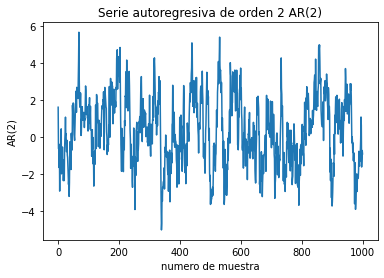

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generemos el ruido blanco
np.random.seed(1)
mu, sigma = 0 ,1
N=1000
Z = np.random.normal(mu, sigma, N)


# coeficientes que satisfacen las condiciones de estabilidad
phi_1 = 0.7
phi_2 = 0.2

X=np.zeros(N)
X[0]=Z[0]
X[1]=Z[1]

for t in range(2,N):
    X[t]= phi_1*X[t-1] + phi_2*X[t-2]+ Z[t]

plt.xlabel("numero de muestra")
plt.ylabel("AR(2)")
plt.title("Serie autoregresiva de orden 2 AR(2)")
plt.plot(X);
plt.show()



## ACF se puede calcular con la siguiente recursion

$$ \rho_k = \phi_1 \rho_{k-1} + \phi_2 \rho_{k-2} $$


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


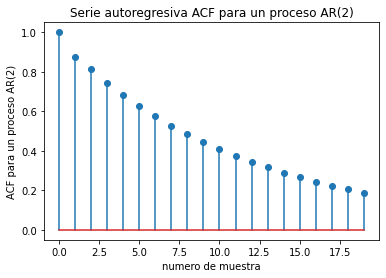

In [ ]:
M=20 # numero de muestras para la ACF
rho=np.zeros(M)
rho[0]=1
rho[1] = phi_1/(1 - phi_2)

for k in range(2, M):
    rho[k] = phi_1* rho[k-1] + phi_2 * rho[k-2]

plt.xlabel("numero de muestra")
plt.ylabel("ACF para un proceso AR(2)")
plt.title("Serie autoregresiva ACF para un proceso AR(2)")
plt.stem(rho)
plt.show()


# metodo analitico basado en la solucion de ecuaciones en diferencias (homogeneas)

   \begin{eqnarray*}
      \rho_0 &=& 1  \nonumber \\
      \rho_1 &=& \frac{\phi_1}{1 - \phi_2}  \nonumber \\
      \rho_k &=& \frac{1}{\sigma^2} \frac{r_1 (\sigma^2 - r_2 \gamma_1)}{r_1 - r_2}
      \left ( \frac{1}{r_1} \right )^k + 
      \frac{1}{\sigma^2} \frac{r_2 ( r_1 \gamma_1 - \sigma^2)}{r_1 - r_2} 
      \left ( \frac{1}{r_2} \right )^k  \, . 
    \end{eqnarray*}

La general
\begin{eqnarray}
  X_{th} &=& C_1 \left ( \frac{1}{r_1} \right )^t + C_2   
  \left ( \frac{1}{r_2} \right )^t \nonumber \\
  C_1  &=& \frac{r_1 ( X_0 - r_2 X_1 )}{r_1 -r_2}  \quad , \quad 
  C_2 = \frac{r_2(r_1 X_1 - X_0)  }{r_1 - r_2}. 
\end{eqnarray}




root 1= -4.589454172900136
root 2= 1.0894541729001366


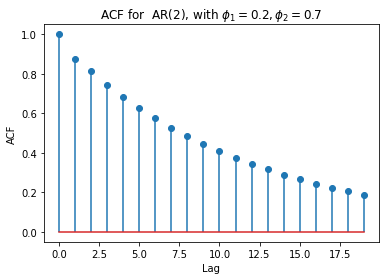

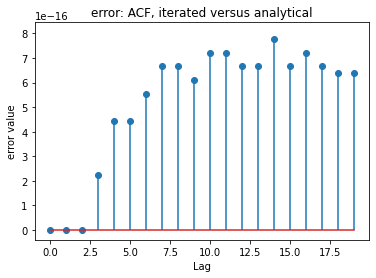

0.9622367258209522

In [ ]:
M=20
rhoA=np.zeros(M)
# r1, r2 are roots of the quadractic characteristic polynomial 1 - 0.7 B - 0.2B^2
r1=(0.7 + np.sqrt((0.7)**2 + 4*(0.2)))/(-2*0.2)
r2=(0.7 - np.sqrt((0.7)**2 + 4*(0.2)))/(-2*0.2)
print("root 1=",r1)
print("root 2=",r2)
coeff = 1.0/(r1-r2)
rhoA[0] = 1
rhoA[1] = phi_1/(1-phi_2)

C1 = (r1*(rhoA[0] - r2*rhoA[1]))/(r1-r2)
C2 = (r2*(r1*rhoA[1] - rhoA[0]))/(r1-r2)
for i in range(2,M):
    rhoA[i] = C1*(1/r1)**i + C2*(1/r2)**i


plt.xlabel("Lag")
plt.ylabel("ACF")
plt.title("ACF for  AR(2), with $\phi_1=0.2, \phi_2=0.7$")
plt.stem(rhoA, use_line_collection=True)
plt.savefig('ACFAR2closedform.pdf')
plt.show();
plt.xlabel("Lag")
plt.ylabel("error value")
plt.title("error: ACF, iterated versus analytical")
plt.stem(rhoA-rho, use_line_collection=True)
plt.savefig('ACFAR2Error.pdf')
plt.show();


C1
C2






## usando statsmodel.api

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


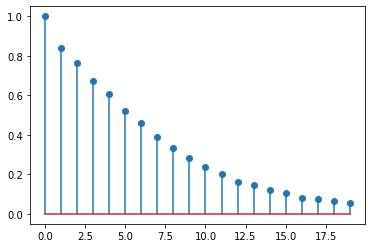

In [ ]:
import statsmodels.api as sm
rho2 = sm.tsa.acf(X)[0:20]
plt.stem(rho2)
plt.show()


In [ ]:
rho2-rho

array([ 0.        , -0.03698908, -0.04662398, -0.07282248, -0.07878705,
       -0.10454541, -0.11531795, -0.1407126 , -0.15163973, -0.16409417,
       -0.17061235, -0.17254782, -0.18158902, -0.16919806, -0.16827537,
       -0.15847853, -0.16313204, -0.14799718, -0.14298236, -0.13350378])

In [ ]:
error = max( abs(rho2-rho))
error


0.18158901982739922

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

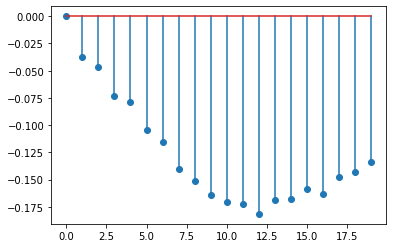

In [ ]:
plt.stem(rho2-rho)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


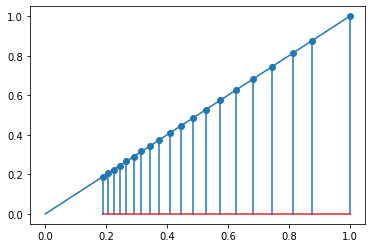

In [ ]:
plt.stem(rho,rhoA)
x=np.arange(0,1,0.01)
plt.plot(x,x)

Entonces para que se usa statsmodels si no es tan preciso como quisieramos.

Sabemos aca que el modelo es AR(2). Y para AR(2) con los coefientes que tambien los conocemos podemos generar un modelo "exacto" (con error del epsilon de la maquina).

Si tomas una serie arbiraria que no sabes de donde viene. Te toca usar un algoritmo numerico.

El error mas que todo se concentra en los bordes.





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

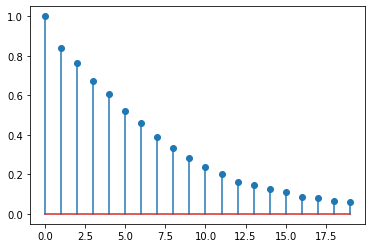

In [ ]:
# shift
# num es shift, fill_value=valor a llenar
from numpy import mean,dot
def  shift(arr , num, fill_value):
    result = np.zeros(len(arr)) # inicializacion con ceros
    if num > 0: # shift es a la derecha
        result[:num] = fill_value
        result[num:] = arr[:-num]
    elif num < 0 : # shift es a la izquierda  ?? error.
        result[num:] = fill_value
        result[:num] = arr[-num:]  
    else :
        result[:] = arr
    return result 



Y=X
fill_value=0
gamma= []
for i in range(0, M):
    U= shift(Y, i, fill_value)
    mu = round(mean(U), 2)
    Us = U - mu
    gamma.append( dot(X, Us)/(len(Y)-1))

plt.stem(gamma/gamma[0])

In [ ]:
gamma/gamma[0]-rho2

array([ 0.00000000e+00, -1.06355438e-04,  5.89773832e-05,  2.57193147e-04,
        6.43844575e-04,  6.27054652e-04,  8.52285354e-04,  9.15967148e-04,
        1.20630137e-03,  1.47478226e-03,  1.77438023e-03,  1.92890529e-03,
        1.20325331e-03,  1.51191196e-03,  1.96751901e-03,  2.31803176e-03,
        2.81350009e-03,  3.29001959e-03,  2.71552152e-03,  3.31019146e-03])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

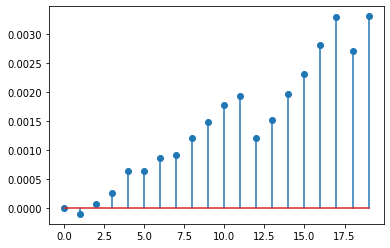

In [ ]:
plt.stem(gamma/gamma[0]-rho2)

In [ ]:
max(abs((gamma/gamma[0]-rho2)))

0.003310191461248717

Otra forma de encontrar ACF es usando NumPY
numpy.corrcoef(X,Y)[0,1]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


1999

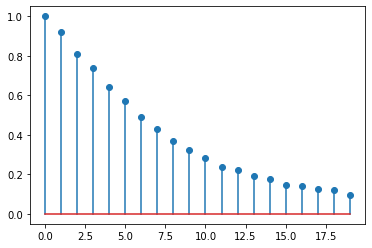

In [ ]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result

Y= autocorr(X)
W=Y[1000:1020]/Y[1000]
plt.stem(W)
len(Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

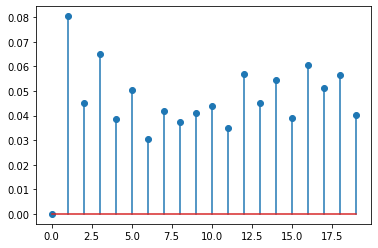

In [ ]:
plt.stem(W-rho2)

# Procesos AR(p), p$>2$

El proceso se definine como

$$X_t = c + \sum_{i=1}^{\mathrm{p}} \phi_i X_{t-i} + Z_t $$

por ejemplo p$=3$

$$X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \phi_3 X_{t-3} + 
Z$$

Podemos separar la fuente (la inhomogeneidad)

$$ X_t - \sum_{i=1}^{\mathrm{p}} \phi_i X_{t-i} = c + Z_t  \quad (1)  $$
Esta es una ecuacion en diferencias, no homogenea
si $c \ne 0$ y si $Z_t \ne 0$.  De orden p, 
se necesitan p condiciones iniciales para resolverla.

Ya vimos p=1, p=2 y ahora queremos generalizar todos los procesos vistos arriba a p>2. 

En la ecuacion (1) podemos usar el backshift operator $B$ y escribir

$$ (1 - \phi_1 B - \phi_2 B^2 - \cdots - \phi_{\mathrm{p}} B^{\mathrm{p}} ) X_t = c + Z_t $$


Definamos el polinomio caracteristico

$$p(B)= 1- \phi_1 B - \phi_2 B^2 - \cdots - \phi_p B^p $$

podemos escribir el sistema como

$$p(B) X_t = c + Z_t  \quad , \quad (2)  $$

Representa una ecuacion en diferencias de orden p donde se necesitan p condiciones iniciales. 
La solucion (como en ecuaciones diferenciales) es 
la solucion particular mas la general.

$$ L u = v $$
un sistema lineall (L puede ser una matriz o una ecuacion diferencial). Si existe $u_p$ tal que
$L u_p = v$ y $L u_h = 0$, para $u_h$ entonces

$u=u_p + u_h$ es solucion de $Lu = v$.

PUes

$$Lu = L( u_p + u_h) = L (u_p) + L(u_h) = v + 0 = v$$

Buscamos, luego del descanso , hallar una solucion particular, la solucion homogenea y luego la solucion es la suma de las dos anteriores tal y como hicimos antes. 

Tenemos que hallar

* La solucion particular $X_{tp}$
* La homogenea $X_{th}$

Comenzamos por

### Solucion particular

$$p(B) X_t = c + Z_t  \quad , \quad (2)  $$

de la ecuacion 2

$$ X_t = \frac{c + Z_t}{p(B)}$$
Reucerden que uno no divide por un operador. 
El algebra de operadores nos permite hacer trucos
como los que siguen.

Debemos factorizar el polinomio caracteristico.

$$p(B)= (1 - \varphi_1 B)^{m_1}(1 - \varphi_2 B)^{m_2} \cdots (1 - \varphi_k)^{m_k} $$
donde $m_i$ es las veces que se repite la razi
$r_i =  1 /\varphi_i$ (mire el termino $(1-\varphi_i)^{m_k}$ )
Tambien $m_1 + m_2 + \cdots m_k = p$. (recuerden que el orden del polinomio caracteristico es $p$ pues
$\phi_p \ne 0$. 

Escribamos el polinomio caracteristico de una forma mas util (pensando en las series geoemtricas) 

$$ p(B) = \varphi_1^{m_1} \varphi_2^{m_2} \cdots \varphi_k^{m_k} \left ( \frac{1}{\varphi_1} - B \right )^{m_1} \left ( \frac{1}{\varphi_2} - B \right )^{m_2}  \cdots   \left ( \frac{1}{\varphi_k} - B \right )^{m_k} $$

Generalizando del trabajo anterior las raices del polinomio caracteristico son

$$ r_i = \frac{1}{\varphi_i}  \quad , i=1,2, \cdots, k $$

De forma que:

\begin{eqnarray}
\frac{1}{p(B)} &=& \frac{1}{\varphi_1^{m_1} \varphi_2^{m_2} \cdots \varphi_k^{m_k} \left ( \frac{1}{\varphi_1} - B \right )^{m_1} \left ( \frac{1}{\varphi_2} - B \right )^{m_2}  \cdots   \left ( \frac{1}{\varphi_k} - B \right )^{m_k} } \\
&=& r_1^{m_1} r_2^{m_2} \cdots r_k^{m_k} \frac{1}{(r_1 -B)^{m_1}
(r_2 - B)^{m_2} \cdots (r_k - B)^{m_k}} \\
&=& r_1^{m_1} r_2^{m_2} \cdots r_k^{m_k} \left (  \sum_{i=1}^{m_1} \frac{A_{i1}}{(r_1 - B)^i}   + \sum_{i=1}^{m_2} \frac{A_{i2}}{(r_2 - B)^i}  + \cdots + \sum_{i=1}^{m_k} \frac{A_{ik}}{(r_k - B)^i} 
\right )
\end{eqnarray}
donde los coeficientes $A_{ik}$ deben ser encontrados. 

Con esto, tomemos por ejemplo un termino de esta suma 


\begin{eqnarray}
\frac{A_{ij}}{ (r_j - B)^i} = \frac{A_{ij}}{r_j^i  \left ( 1 - \frac{B}{r_j} \right )^i} = \frac{A_{ij}}{r_{ij}} \left (1 + \frac{B}{r_j} + \left (  \frac{B}{r_j} \right )^2 + \cdots + \left (  \frac{B}{r_j} \right )^k + \cdots 
\right )^i
\end{eqnarray}

Aplicamos este operador $X_t$. Asumamos, por el momento, que $i=1$

\begin{eqnarray}
\frac{A_{1j}}{(r_j - B)} X_t = \frac{A_{ij}}{r_{ij}}
\left ( X_t + \frac{1}{r_j} X_{t-1} + \frac{1}{r_j^2} X_{t-2}  + \cdots + \frac{1}{r_j^k} X_{t-k} + \cdots \right )
\end{eqnarray}

si $i=2$ toca aplicar esto dos veces y si $i=m_i$, donde 
$m_i > 2$ toca aplicarlo $m_i$ veces. 

Se puede apreciar la dificultad para el caso general de p$>2$. Es mejor simplemente , desde el punto de vista numerico, aplicar la formula iterada. 
La ecuacion (1). El analisis que estamos haciendo tiene un gran valor teorico. Por ejemplo, de la expansion que acabmos de hacer vemos que todos los
radios $r_j$ son tales que $| r_j | > 1$. Es decir, todos los ceros del polinomio caracteristico $p(B)$ deben de estar por *fuera* del circulo unitario.
















Listo la solucion particular (formulacion). No vamos tan lejos como cuando hicimos p$=2$, pero formulamos el problema general.

* La solucion homogenea.

Recuerde

$$p(B) = (1 - \varphi_1 B)^{m_1}  (1 - \varphi_2 B)^{m_2} \cdots  (1 - \varphi_k B)^{m_k} X_t = 0 \quad , \quad (3) $$

Como se resuelve esto. Si se tiene un producto igual a 0 , cualquiera de los factores puede 0.
Por ejemplo un factor tipico es:

$$ (1 - \varphi B)^m X_t = 0$$

Como se resuelve este problema.

Vamos a hacer esto en dos pasos. 

1) Pensamos que $\varphi=1$ (por el momento).
Es decir resolvemos inicialmente

$ (1 - B)^m X_t= 0$: De la misma forma como hicimos para p$=2$. Podemos que las soluciones son de la forma $X_t = C_j t^j$, $j=0,1,2, \cdots, m-1$.

Esto lo debemos probar. Por induccion matematica.

> * Asumamos que $m=1$. Entonces $j=0$. En este caso 
$X_t = C_0 t^0 = C_0 = C$. Entonces

$$(1 - B) X_t = (1-B)C = C - B(C) = C - C=0 $$
o seq que para $m=1$ se cumple. Asumamos que se cumple para $0,1, \cdots, m-2$.

Tenemos que $m>1$

\begin{eqnarray}
(1 - B)^m X_t &=& (1-B)^{m-1} (1-B) C t^j \\
&=& (1 - B)^{m-1} C( t^j - (t-1)^j) \\
&=& (1 - B)^{m-1} \left (-C \sum_{i=1}^{j-1} \binom{j}{i} (-1)^{j-i} t^j
    \right )
\end{eqnarray}
La mayor potencia de $t$ es $t^{m-2}$, ah pero la hipotesis de induccion dice que "todos se caen" para $1,2, \cdots m-2$. Entonces

$$(1 - B)^m  X_t = 0  $$

2) Que pasa si $\varphi \ne 1$.

Queremos resolver $(1 - \varphi B)^m X_t = 0$.
De la misma forma que hicimos para el caso p=2,
decimos que las soluciones son de la forma
$X_t = C_j t^j \varphi^t$, $C_j$ son constantes y 
$j=0,1, \cdots , m-1$. Veamos por que esto es cierto.

\begin{eqnarray}
(1 - \varphi B) X_t &=& (1 - \varphi B) C_j t^j \varphi^t  \\
&=& C_j t^j \varphi^t - C_j \varphi (t-1)^j \varphi^{t-1} \\
&=& C_j ( t^j \varphi^t - \varphi (t-1)^j \varphi^{t-1})  \\
&=& C_j [ t^j - (t-1)^j] \varphi^t \\
&=& C_j [ (1- B) t^j ] \varphi^t
\end{eqnarray}


Pero $(1 - B) t^j=0$, $j=0,1,2, \cdots, m-1$. 
De forma que

$$ (1 - \varphi B) X_t = 0 $$
Podemos aplicar esto $m$ veces

$$ (1 - \varphi B)(1 - \varphi B) \cdots (1 - \varphi B) X_t = 0$$. $m$ veces. 

Queda probado que la solucion es de la 
forma $C_j t^j \varphi_j^t $. 
Cualqueir combinacion lineal de estas es solucion.


Solucion seria $\sum_j C_j t^j \varphi_j^t$

Recuerde que el polinomio carateristico se factorizo
como un producto de $k$ factores con potencias $m_k$




La solucion homogenea es:


$$ X_{th} = \sum_{i=1}^k \sum_{j=0}^{m_k -1} C_{ij} t^j \varphi_i^t $$